In [1]:
pip install numpy pandas scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn import tree

In [7]:
df = pd.read_csv('credit_score.csv')
print(df.head())

   income  credit_score  target  job_title_Doctor  job_title_Engineer  \
0    0.36         -1.55       0             False               False   
1   -0.12         -0.49       0             False               False   
2    0.48         -0.40       1             False                True   
3    1.15         -0.90       0             False               False   
4   -0.20         -0.21       0             False                True   

   job_title_Teacher  income_log  
0               True    0.310466  
1               True   -0.130651  
2              False    0.391867  
3              False    0.765678  
4              False   -0.218092  


In [11]:
df = df.dropna()

In [12]:
# Features (X) and Target (y)
X = df[['credit_score', 'income_log']]  # Features
y = df['target']  # Target variable (0 = Fail, 1 = Pass)

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data: {X_train.shape}, {y_train.shape}")
print(f"Testing data: {X_test.shape}, {y_test.shape}")

Training data: (69, 2), (69,)
Testing data: (18, 2), (18,)


In [13]:
# Initialize the Logistic Regression model
logreg_model = LogisticRegression()

# Train the Logistic Regression model
logreg_model.fit(X_train, y_train)

# Make predictions using the test set
y_pred_logreg = logreg_model.predict(X_test)

# Evaluate the Logistic Regression model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {accuracy_logreg}")

Logistic Regression Accuracy: 0.9444444444444444


In [14]:
# Initialize the Decision Tree Classifier
tree_model = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree model
tree_model.fit(X_train, y_train)

# Make predictions using the test set
y_pred_tree = tree_model.predict(X_test)

# Evaluate the Decision Tree model
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"Decision Tree Accuracy: {accuracy_tree}")

Decision Tree Accuracy: 0.9444444444444444


In [15]:
# Evaluate Logistic Regression
print("Logistic Regression:")
print(f"Accuracy: {accuracy_logreg}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg))
print("Classification Report:")
print(classification_report(y_test, y_pred_logreg))

# Evaluate Decision Tree
print("Decision Tree:")
print(f"Accuracy: {accuracy_tree}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_tree))
print("Classification Report:")
print(classification_report(y_test, y_pred_tree))

Logistic Regression:
Accuracy: 0.9444444444444444
Confusion Matrix:
[[8 0]
 [1 9]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.90      0.95        10

    accuracy                           0.94        18
   macro avg       0.94      0.95      0.94        18
weighted avg       0.95      0.94      0.94        18

Decision Tree:
Accuracy: 0.9444444444444444
Confusion Matrix:
[[8 0]
 [1 9]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.90      0.95        10

    accuracy                           0.94        18
   macro avg       0.94      0.95      0.94        18
weighted avg       0.95      0.94      0.94        18



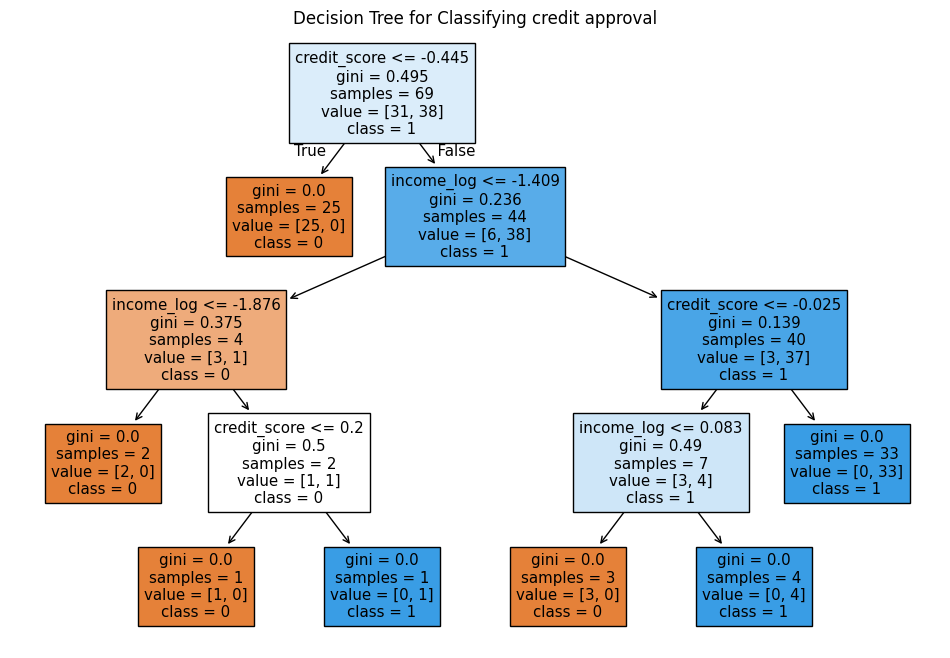

In [17]:
# Visualize the decision tree
plt.figure(figsize=(12,8))
tree.plot_tree(tree_model, feature_names=['credit_score', 'income_log'], class_names=['0', '1'], filled=True)
plt.title('Decision Tree for Classifying credit approval')
plt.show()